<center><h1>Análise Numérica</h1></center>
<center><h2>2022/1</h2></center> 
<center><h3>Regressão linear Univariada</h3></center>
<center><h4>Prof. Fernando Deeke Sasse - CCT, UDESC</h4></center>

### 1. Ajuste de retas pelo método de mínimos quadrados

Usaremos a biblioteca opimize do scypy:

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

Suponhamos que um experimento que descreve uma relação $x=x(t)$ produz os resultados mostrados na tabela abaixo:

In [69]:
T = np.array([1.3,3.3,4.1,6.4,7.3,9.2])
X = np.array([2.5,3.8,4.2,5.2,6.5,7.3])

Façamos um gráfico destes pontos: 

Text(0, 0.5, 'X')

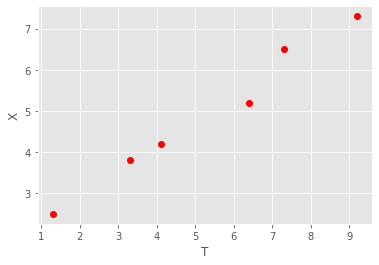

In [70]:
plt.plot(T,X,'ro')
plt.xlabel('T')
plt.ylabel('X')

Uma conclusão razoável é que a função $x(t)$ é linear e que o fato dos pontos não estarem exatamente sobre uma linha reta é devido a erros experimentais. Um vez feita tal suposição podemos nos perguntar como podemos determinar os coeficientes $a$ e $b$ reta
$$
                           x = at + b
$$  
que melhor se ajusta a esses dados. 


Suponhamos que uma suposição é feita sobre os valores de $a$ e $b$. Em geral,um ponto $(T_k,X_k)$ não estará exatamente sobre a reta, ou seja,

$$
aT_k+b-X_k \neq 0
$$

Podemos definir um erro absoluto associado a este ponto, que depende de $a$ e $b$, dado por

$$
                 E_k(a,b)=|aT_k+b-X_k|
$$

Supondo que, em geral, temos $n$ pontos, o erro total $E(a,b)$ é a soma dos erros associados a todos os $n$ pontos: 

$$
               E(a,b)=\sum_{i=1}^{n} |aT_k+b-X_k|
$$

A próxima tarefa consiste em encontrar o ponto $(a,b)$ que minimiza esta função.

Este problema éum exemplo de uma  aproximação $L_1$ e que pode ser resolvido por meio de técnicas de programação linear. Dependendo do número de pontos a complexidade deste problema em termos de número de operações pode ser muito custosa. O métodos do cálculo diferencial não podem ser aplicados, pois esta função não é diferenciável. 


Na prática, é mais conveniente minimizar a seguinte função de erro de $a$ e $b$: 

$$
\phi(a,b)=\sum_{i=1}^{n} (aT_k+b-X_k)^2,
$$

que pode ser minimizada por meio de técnicas de cálculo. ALém disso, é possível mostrar que se os erros têm uma distribuição normal, então a minimização de $\phi(a,b)$ produz o melhor estimador de $a$ e $b$. Esta é a chamada aproximação $L_2$. 

As condições necessárias para que um ponto $(a,b)$ seja um mínimo de $\phi$ são

$$
\frac{\partial \phi}{\partial a}=0\,,\qquad \frac{\partial \phi}{\partial b}=0\,.
$$

Em particular, 

$$
\frac{\partial \phi}{\partial a}=\sum_{i=1}^{n} 2T_k(aT_k+b-X_k)=0
$$

e

$$
\frac{\partial \phi}{\partial b}=\sum_{i=1}^{n} 2(aT_k+b-X_k)=0\,.
$$

Estas equações, chamadas *normais* podem ser também escritas como 



$$
\left(\sum_{k=1}^n T_k^2\right)a+\left(\sum_{k=1}^n T_k\right)b= \sum_{k=1}^n T_k X_k,
$$

$$
\left(\sum_{k=1}^n T_k\right)a+nb=\sum_{k=1}^n X_k.
$$

Definindo

$$
p = \sum_{k=1}^n T_k\,,\quad q=\sum_{k=1}^n X_k\,,\quad
r=\sum_{k=1}^n T_k X_k\,,\quad s=\sum_{k=1}^n T_k^2\,,
$$

temos, de forma matricial, 

$$
\begin{bmatrix}
s&p\\p&n
\end{bmatrix}= 
\begin{bmatrix}
a\\b
\end{bmatrix}=\begin{bmatrix}
r\\q
\end{bmatrix}\,.
$$

Definindo 

$$
\Delta = det \begin{bmatrix}
s&p\\p&n
\end{bmatrix} = ns-p^2\,,
$$

temos, usando a regra de Cramer, 

$$
a = \frac{1}{\Delta}det\begin{bmatrix}
r&p\\q&n
\end{bmatrix}=\frac{1}{d}(rn-pq)\,,
$$

$$
b = \frac{1}{\Delta}det\begin{bmatrix}
s&r\\p&q
\end{bmatrix}=\frac{1}{d}(sq-pr)\,.
$$

Voltemos ao nosso problema. Temos aqui 

In [71]:
p = np.sum(T)
q = np.sum(X)
r = np.sum(T*X)
s = np.sum(T**2)
n = np.size(T)

In [72]:
d = n*s-p**2

O coeficiente angular da reta é dado por

In [73]:
a = 1/d*(r*n-p*q)
a

0.6100669002867147

O coeficiente linear é:

In [74]:
b = 1/d*(s*q-p*r)
b

1.7036476584899696

Façamos o gráfico da reta: 

In [75]:
t = np.linspace(0, 10,100)

Text(0, 0.5, 'x')

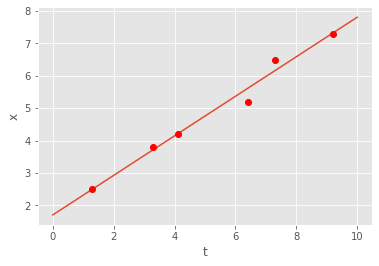

In [76]:
plt.plot(t,a*t+b)
plt.plot(T,X,'ro')
plt.xlabel('t')
plt.ylabel('x')

Visualmente o ajuste parece bem feito. Podemos agora determinar $x(t)$ para valores não tabelados. Por exemplo determinemos $x(4.5)$. A função que define a reta é dada por

In [77]:
def f(t, a, b):
    return a*t + b

Portanto,

In [78]:
round(f(4.5,a,b),2)

4.45

Podemos resolver este problema diretamente, usando o comando curve_fit do scipy:

In [79]:
from scipy.optimize import curve_fit

In [80]:
def g(t, a, b):
    return a*t+b

O comando que realiza o ajuste pelo método de mínimos quadrados é o seguinte: 

In [81]:
param, pcov = curve_fit(g, T, X)

O primeiro argumento é o array com os valores dos parâmetros (o segundo é a matriz de covariância, que não nos interessa neste momento):

In [82]:
param

array([0.6100669 , 1.70364765])

que são os mesmos valores encontrados anteriormente. Façamos o gráfico correspondente:

Text(0, 0.5, 'x')

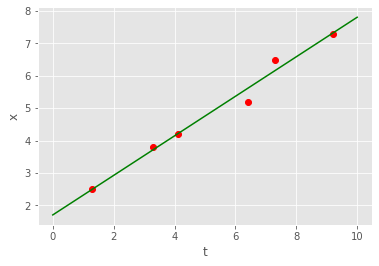

In [83]:
plt.plot(T,X,'ro', t, g(t, *param), 'g-')
plt.xlabel('t')
plt.ylabel('x')

Podemos quantificar o erro no ajuste calculando o erro quadrático médio. Definimos o array que calcula o valor da função $g(t)$, agora com os parâmetros determinados, em cada componente do array $T$: 

In [84]:
F = g(T,*param)
F

array([2.49673463, 3.71686843, 4.20492195, 5.60807582, 6.15713603,
       7.31626314])

Podemos agora calcular o erro quadrático médio:

In [85]:
n=len(F)
np.sum(F-X)**2/n

5.3958137275249056e-20

### Ajuste de funções quaisquer pelo método de mínimos quadrados

Esta técnica pode ser generalizada para ajustar qualquer função a um conjunto de dados. Por exemplo, suponhamos que temos os dados:

In [86]:
x = np.array([1., 1.5,2.,3.,4.,5.])
y = np.array([5.3,6.4,8.2,7.2,6.6,4.3])

Façamos um gráfico destes pontos: 

Text(0, 0.5, 'y')

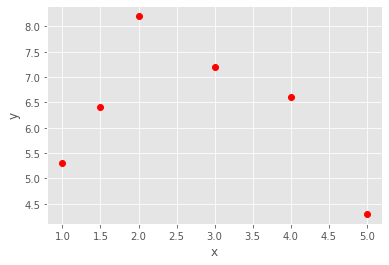

In [87]:
plt.plot(x,y,'ro')
plt.xlabel('x')
plt.ylabel('y')

Se quisermos, por exemplo ajustar a função $f(t) = a+bt+ct^2+d\mbox{e}^{-t}$ a estes dados, devemos minimizar o erro:

$$
\phi(a,b,c,d)=\sum_{k=1..n}(a+bt_k+ct_k^2+\mbox{e}^{-t_k})^2
$$

O ponto de mínimo deve satisfazer:

$$
\frac{\partial \phi}{\partial a}=0\,,\quad \frac{\partial \phi}{\partial b}=0\,,\quad
\frac{\partial \phi}{\partial c}=0\,,\quad
\frac{\partial \phi}{\partial d}=0\,.
$$

Como os parâmetros a serem determinados aparecem linearmente, estas 4 condições geram 4 equações lineares que determinam os valores dos parâmetros que minimizam o erro. Note que se os parâmetros aparecerem de forma não linear na função de ajuste, a correspondente equação para os parâmetros será não-linear e sua solução pode ser difícil de ser encontrada. 

Façamos o ajuste diretamente, usando comandos do Python:

In [88]:
def h(t, a, b,c,d):
    return a + b*t+c*t**2 +d*np.exp(-t)

In [89]:
param, pcov = curve_fit(h, x, y)

In [90]:
param

array([  9.94129038,   0.24102586,  -0.268331  , -12.8094166 ])

Façamos o gráfico correspondente: 

In [91]:
t = np.linspace(0.9, 5.1,30)

Text(0, 0.5, 'y')

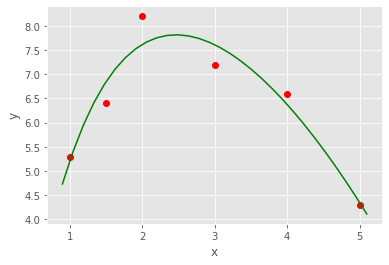

In [92]:
plt.plot(x,y,'ro', t, h(t, *param), 'g-')
plt.xlabel('x')
plt.ylabel('y')

Podemos quantificar o erro no ajuste calculando o erro quadrático médio. Definimos o array que calcula o valor da função $f$, agora com os parâmetros determinados, em cada componente do array $x$: 

In [93]:
H = h(x,*param)
H

array([5.20166422, 6.84091725, 7.61645209, 7.61164568, 6.3774852 ,
       4.35183556])

Lembremos que os valores das ordenadas são dados por: 

In [94]:
y

array([5.3, 6.4, 8.2, 7.2, 6.6, 4.3])

Podemos agora calcular o erro quadrático médio: 

In [95]:
n=len(y)
np.sum(H-y)**2/n

1.977404313678284e-18

Suponhamos que queremos inferir o valor de $y(0.5)$:

In [100]:
round(h(4.5,*param),2)

5.45

### Método dos gradientes descendentes

O método descrito anteriormente funciona bem para funções de uma variável e quando o número de pontos não é muito grande. Descreveremos agora um método mais apropriado para lidar com ajuste de funções de uma ou mais variável, que funciona bem com um número muito grande de pontos. 

Supondo que temos $m$ dados, o objetivo da regressão linear, neste contexto, é minimizar a função de custo

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

sendo $y^{(i)}$ os valores observados e $h_{\theta}(x)$ a hipótese, dada pelo modelo linear

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

Para fins computacionais na expressão acima definimos os vetores

$$
\theta^T = [\theta_0 \,\,\theta_1]\,,\qquad x^T = [ 1,x_1]\,.
$$

O método dos gradientes descendentes consiste em  minimizar a função de custo $J(\theta)$ iterando 
        
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)},
$$ 

atualizando simultaneamente $\theta_j$ para  $j=0,1$, até que ocorra a convergência. O valor de $\alpha$ define o passo deve ser ajustado de modo que a convergência não seja muito lenta (se for muito pequeno), nem ultrapasse o mínimo (se for muito grande). 

Vejamos um exemplo [1] que envolve a relação dos lucros de uma companhia que faz compartilhamento de bicicletas e a população da cidade na qual esta companhia oferece o serviço. Importaremos os dados do arquivo bike_sharing_data.txt. Usaremos a biblioteca pandas para melhor visualização dos dados:

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv('bike_sharing_data.txt')

Podemos visulizar as primeiras linhas do arquivo:

In [15]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Os dados das duas colunas estão em unidades de 10000. Outras informações podem ser obtidas por meio do atributo:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Ou seja, temos dados de 97 cidades. Façamos um gráfico:

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

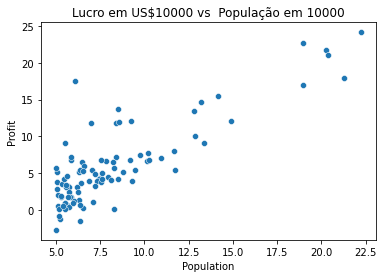

In [20]:
ax = sns.scatterplot(x= "Population", y="Profit", data=data)
ax.set_title("Lucro em US$10000 vs  População em 10000");

Usando ggplot, temos um estilo mais elegante de gráfico:

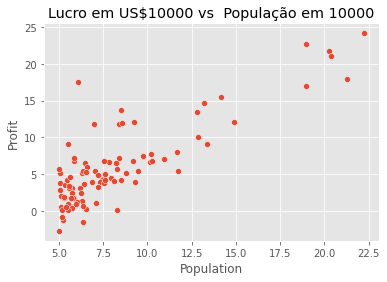

In [22]:
plt.style.use('ggplot')
ax = sns.scatterplot(x= "Population", y="Profit", data=data)
ax.set_title("Lucro em US$10000 vs  População em 10000");

Este gráfico indica que um ajuste linear é apropriado. Implementemos função de custo:

In [23]:
def cost_function(X,y,theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred-y)**2
    return 1/(2*m)*np.sum(error)

Especificamos o tamanho da amostra:

In [24]:
m = data.Population.values.size
m

97

In [26]:
import numpy as np

Atribuímos os valores de população à matriz $x = [1, x_1]$:

In [32]:
x = np.append(np.ones((m,1)),data.Population.values.reshape(m,1), axis =1)
x[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

Os dados de lucro são armazenados no vetor $y$:

In [34]:
y = data.Profit.values.reshape(m,1)
y[0:10]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233],
       [11.886 ],
       [ 4.3483],
       [12.    ],
       [ 6.5987],
       [ 3.8166]])

O vetor de parâmetros $\theta=[\theta_0,\theta_1]^T$ terá valor inicial nulo:

In [35]:
theta = np.zeros((2,1))
theta

array([[0.],
       [0.]])

Testemos a função de custo com estes valores:

In [36]:
cost_function(X,y,theta)

32.072733877455676

Definimos a função que itera os valores de $\theta$ e examina como varia a função de custo:

In [37]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred-y))
        theta -=alpha*1/m*error
        costs.append(cost_function(X,y,theta))
    return theta, costs

Façamos um teste com $\alpha = 0.01$:

In [38]:
theta, costs = gradient_descent(X,y,theta, alpha=0.01, iterations=2000)

In [39]:
theta[0,0]

-3.7880685727231094

In [41]:
theta[1,0]

1.1822127747573767

In [42]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Para fazer o gráfico da reta resultante, transformemos $\theta$ em um array 1D:

In [45]:
theta = np.squeeze(theta)
theta

array([-3.78806857,  1.18221277])

Façamos o gráfico:

Text(0.5, 1.0, 'Linear Regression')

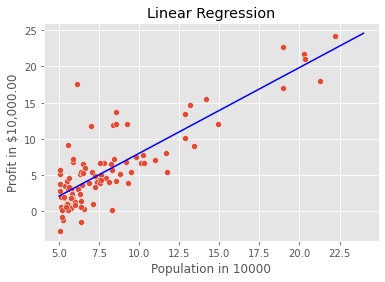

In [55]:
sns.scatterplot(x="Population", y="Profit", data=data)
x_value = [x for x in range(5,25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
plt.plot(x_value,y_value,'b-')
plt.xlabel("Population in 10000")
plt.ylabel("Profit in $10,000.00")
plt.title("Linear Regression")

### Inferência usando os valores otimizados de $\theta$

Com $\theta$ já calculado podemos definir a função que faz as predições para o lucro

$$
h_{\theta}(x) = \theta^T x
$$

In [56]:
def predict(x,theta):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred

Por exemplo, 

In [61]:
y_pred1 = predict(np.array([1,4]),theta)*10000
print("Predição de lucro para uma população de 40000: US$" +str(round(y_pred1,2)))

Predição de lucro para uma população de 40000: US$9407.83


In [62]:
y_pred2 = predict(np.array([1,8.3]),theta)*10000
print("Predição de lucro para uma população de 83000: US$" +str(round(y_pred2,2)))

Predição de lucro para uma população de 83000: US$60242.97


<h3>Exercícios</h3> 

**1.** Considere a funções $f(t) = a+bt+ct^2+dt^3+f\mbox{e}^{-t}$ e $f(t) = a+bt+ct^2+dt^3+f t^4$ e verifique, usando curve_fit, se cada ajuste é melhor ou pior do que o do exemplo para os dados  

In [2]:
import numpy as np

In [3]:
x = np.array([1., 1.5,2.,3.,4.,5.])
y = np.array([5.3,6.4,8.2,7.2,6.6,4.3])

**2.** Sejam os pontos: 

In [227]:
x = np.array([1.1,1.5,2.6, 2.8,3.3,4.3,5.4,6.8,7.3])
y = np.array([4.3,5.3,6.4,7.2,7.1,6.3,5.4, 3.5,3.2])

Determine uma função (escolha a forma), linear em 4 parâmetros, que se ajuste a estes dados, usando o método dos mínimos quadrados. Use curve_fit.

**3.** Resolva o problema do ajuste linear "número de habitantes vs lucro" usando o método dos mínimos quadrados (curve_fit) e compare com o resultado obtido usando gradientes descendentes.

**4.** Use os dados de advertising.csv [2] e use o método de gradientes descendentes para determinar os ajustes lineares univariados de vendas por propaganda em (i) TV, (ii) rádio e (iii) jornal.

### Bibliografia

**1.** Snehan Kekre, Linear Regression with NumPy and Python, Coursera Project Network, https://www.coursera.org/projects/linear-regression-numpy-python

**2.** Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning, 2nd ed., Springer, 2021.  https://www.statlearning.com/resources-second-edition